In [1]:
import numpy as np
import pandas as pd
import malko_fly as mf

mf.pb.cMapNotSym = mf.pb.plt.cm.viridis_r
mf.pb.cMapSym = mf.pb.plt.cm.PuOr_r

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [41]:
nPosts = 2
dVal = 0.8    # distance cutoff to filter trajectories that end too far from the posts

dataDIR = '/media/user/Samsung_T3/Work/Documents/Data/flyVR/new_experiments/'
dbDIR = '/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/dbGen/'

folders = ['']#['multi_post_sleep_fast', 'multi_post_sleep_med', 'multi_post_fast', 'multi_post_slow']

In [42]:
class MalkoFly:
    def __init__(self, dataDIR, projectDB, expDB, nPosts, dVal):
        self.dataDIR = dataDIR
        self.projectDB = projectDB
        self.expDB = expDB
        self.nPosts = nPosts
        self.dVal = dVal
    def __call__(self):
        df, fetched, angles = self.preprocessData()
        df = self.distanceFilter(df)
        return df, self.getArchitechture(df, fetched, angles)
    def preprocessData(self):
        return mf.preprocess_fly_data(self.dataDIR, self.projectDB, self.expDB, self.nPosts)
    def distanceFilter(self, df):
        return mf.distance_filter_trajectories(self.dVal, df)
    def getArchitechture(self, df, fetched, angles):
        return mf.get_malko_architecture(self.projectDB, self.expDB, self.nPosts, df, fetched, angles)

In [43]:
all_experiments = mf.swarm.Swarm()
for i in range(0,len(folders)):
    projectDB = dbDIR + folders[i] + '/flyProjects.db'
    expDB = dbDIR + folders[i] + '/flyExperiments.db'
    
    malkofly = MalkoFly(dataDIR, projectDB, expDB, nPosts, dVal)
    df, massive_experiment = malkofly()
    all_experiments.addFish(massive_experiment)

fetched : [('7b035fd1-bf5d-4b17-b07b-fdce31c00174',), ('0cac2ffa-751c-47e2-a60c-a4394f0c3694',), ('730e9871-40e2-49f2-951e-64ee4c6a264b',), ('14aa360d-a93c-4c1c-bfa4-fe3d46fea4fe',), ('ae62bd32-c787-4ace-af5e-5602fd41c6de',), ('7b78ebae-f5d9-45b1-8a06-64ef4ac1be26',), ('32b3e6c4-0254-4a34-a89f-b4511f867a43',), ('be8d0ed4-cb4d-4be1-9197-ed3070a2d6c0',), ('02729761-34f5-47d3-853d-24d44b95e01a',), ('e5009561-0dc8-45a3-80d9-e23619ae9f63',), ('766cebfa-ec3a-45ae-bee8-c45b9af7e890',), ('811f4e3f-e84a-44fa-9aa2-c4cc5452b6b1',), ('b3122f45-b25b-49ab-994f-de87d61cd420',), ('38940006-4529-46a0-a368-e732cd684c29',), ('e02e2fb4-c50e-4d72-bd5e-f64e24bd718c',), ('4bc09102-9e80-4b75-9162-bfe947b89847',), ('4c934967-64bd-421e-9f00-cc017df1d6cd',), ('a7df1714-2578-469d-afc2-712db8adeac0',), ('d8794167-49af-44a7-8ade-cbe6dafcd718',), ('85e8dae9-3b21-42bb-8d27-b57d411cb94c',)]
(2636225, 3)


/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:313: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (np.linalg.norm(v1, axis=1))[:, None]
/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:314: RuntimeWarning: invalid value encountered in true_divide
  v2 = v2 / (np.linalg.norm(v2, axis=1))[:, None]


 -- Architecture --


/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


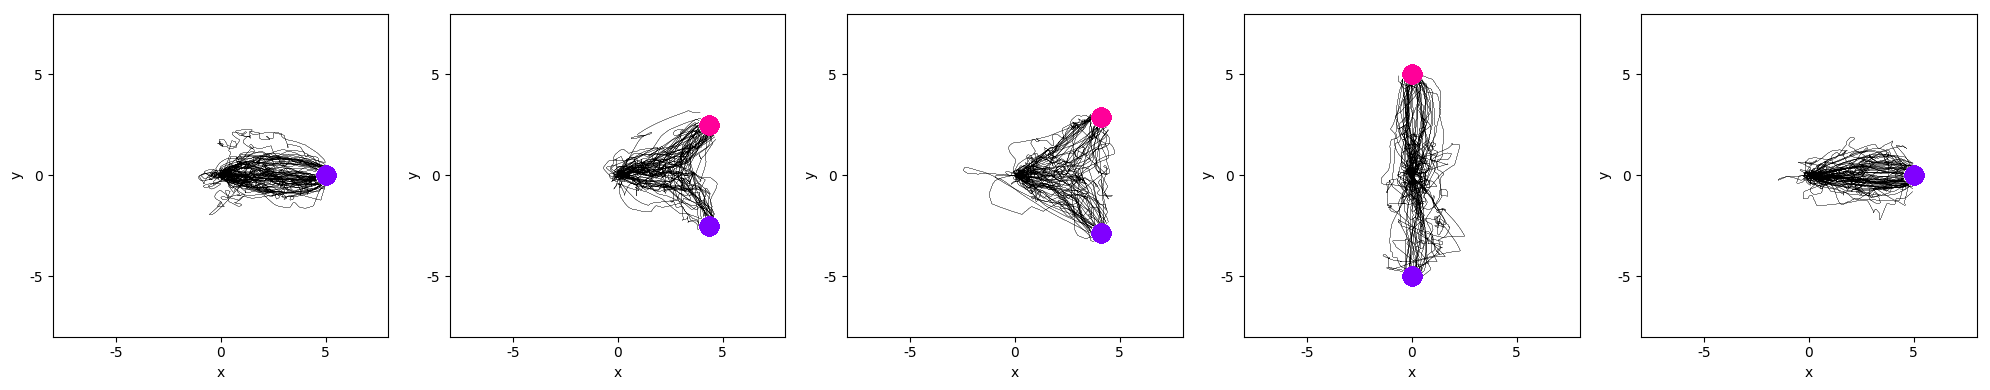

In [44]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,)).metaFish['x'][:,0], 
                             all_experiments.get((y,x,)).metaFish['x'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(-8,8), ylim=(-8,8),
                             figSize = (4*xTab,4*yTab), markers = True, markerSize = 1, alpha = 0.01)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,1)).var['x'][:,0], 
                             all_experiments.get((y,x,0,0,1)).var['x'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                             ids = 0, markers = True, markerSize = 14, hold = True)
        if x != 0 and x != xTab-1:
            fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,2)).var['x'][:,0], 
                                 all_experiments.get((y,x,0,0,2)).var['x'][:,1],
                                 fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                                 ids = 1, markers = True, markerSize = 14, hold=True)
            if nPosts == 3:
                fig, ax = mf.pb.plot(all_experiments.get((y,x,0,0,3)).var['x'][:,0], 
                                     all_experiments.get((y,x,0,0,3)).var['x'][:,1],
                                     fig = fig, xTab = xTab, yTab = yTab, kTab = k, ax = ax, 
                                     ids = 2, markers = True, markerSize = 14, hold = True)

mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/trajectories_' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


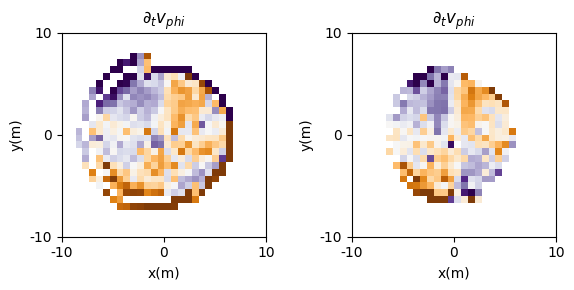

In [10]:
xTab = 2
yTab = len(folders)
plotK = 5
fig = []

fig = mf.plotter.FigureKatz(all_experiments.get((y,0,)).metaFish, 
                         all_experiments.get((y,0,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 1)

fig = mf.plotter.FigureKatz(all_experiments.get((y,4,)).metaFish, 
                         all_experiments.get((y,4,)).metaFishRef,
                         beats = False, lrPlot = False, fbPlot = False, rzPlot = False, noTitle = False, 
                         plotK = plotK, fig = fig, xTab = xTab, yTab = yTab, kTab = 2)

mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/controls_' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


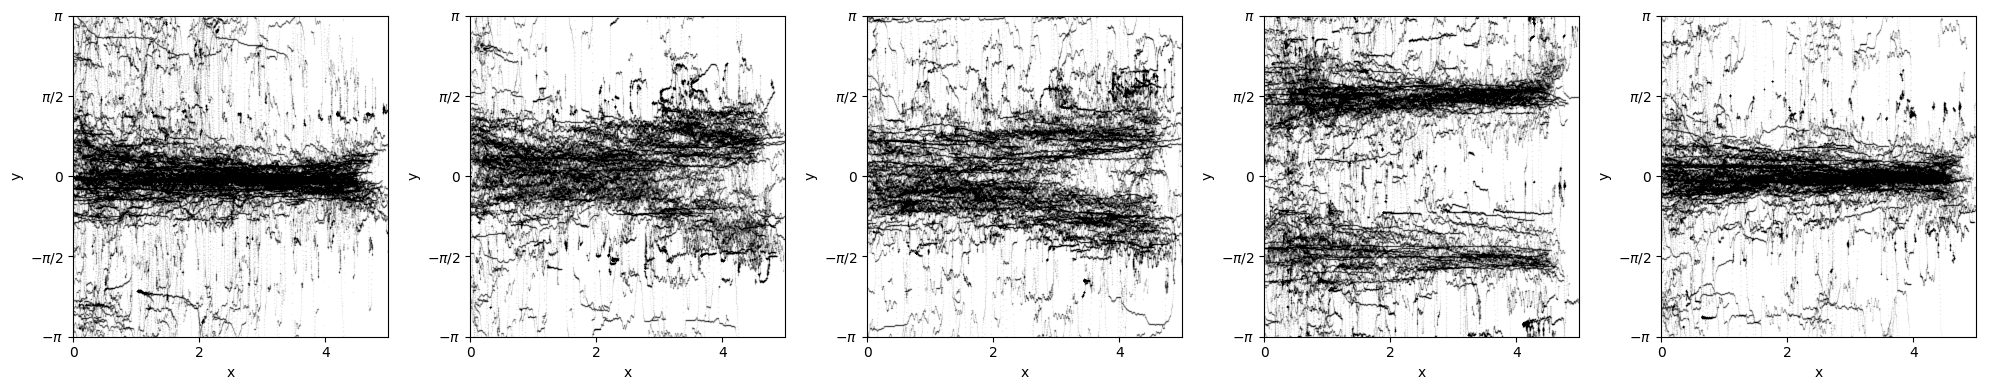

In [11]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        fig, ax = mf.pb.plot(all_experiments.get((y,x,)).metaFish['r'][:,0], 
                             all_experiments.get((y,x,)).metaFish['vr'][:,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(0,5), ylim=(-np.pi,np.pi),
                             figSize = (4*xTab,4*yTab), markers = True, markerSize = 1, alpha = 0.05)
        
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/polar_plots_' + str(nPosts) + '.png', format='png', dpi=300)

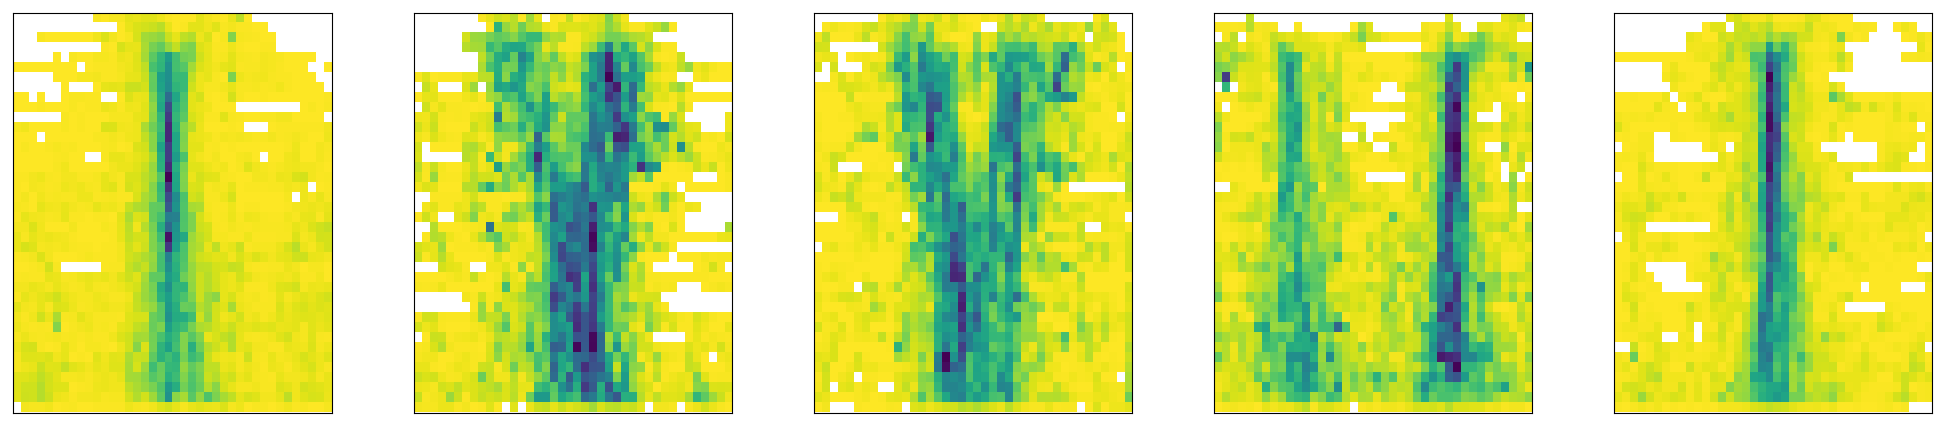

In [12]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab*y + (x+1)
        idx = np.where(all_experiments.get((y,x,)).metaFish['r'][:,0] > 0.1)     # avoid bright spot at (0,0)
        fig = mf.pb.katzPlot(all_experiments.get((y,x,)).metaFish['r'][idx,0], 
                             all_experiments.get((y,x,)).metaFish['vr'][idx,1],
                             fig = fig, xTab = xTab, yTab = yTab, kTab = k, xlim=(0,5), ylim=(-np.pi,np.pi),
                             figSize = (4*xTab,4*yTab), noTicks=True, noSpace=True)
        
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_polar_plots_' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


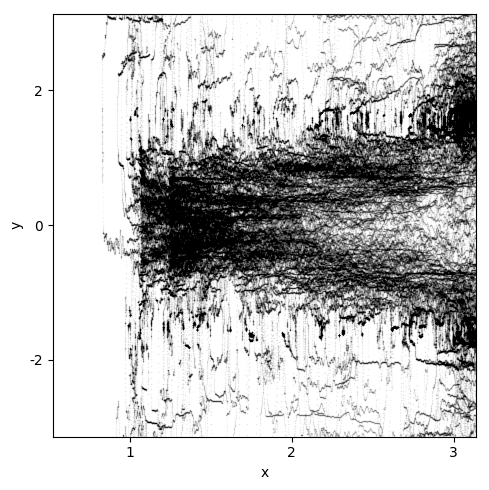

In [13]:
xTab = 5
y = 0
fig = []
ax = []
app_ang = []
direc = []

for x in range(1, xTab-1):
    idx = np.where(all_experiments.get((y,x,)).metaFish['r'][:,0] > 0.1)     # avoid bright spot at (0,0)
    hold = False if ax == [] else True

    xs = np.squeeze(-2*np.arctan2(np.unique(all_experiments.get((y,x,0,0,1)).var['x'][:,1])[0], 
                                  np.unique(all_experiments.get((y,x,0,0,1)).var['x'][:,0])[0] - all_experiments.get((y,x,)).metaFish['x'][idx,0]))
    ys = np.squeeze(all_experiments.get((y,x,)).metaFish['vr'][idx,1])
    app_ang = xs if x == 1 else np.concatenate((app_ang, xs), axis=0)
    direc = ys if x == 1 else np.concatenate((direc, ys), axis=0)

    fig, ax = mf.pb.plot(xs, ys, fig = fig, ax = ax, xlim = (np.pi/6,np.pi), markers = True, 
                         markerSize = 1, alpha = 0.05, hold = hold)
    
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/dir_vs_apparent_ang' + str(nPosts) + '.png', format='png', dpi=300)

/home/user/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


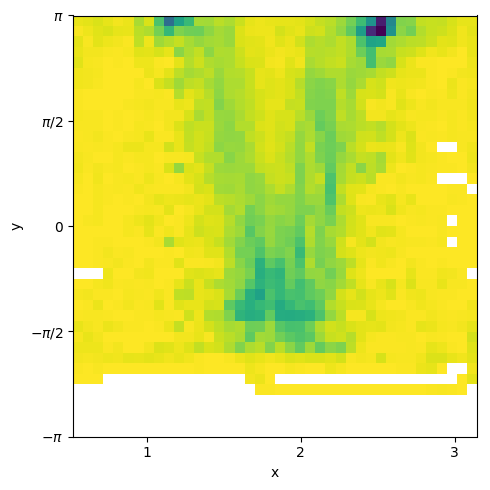

In [14]:
fig = mf.pb.katzPlot(app_ang, direc, xlim=(np.pi/6,np.pi), ylim=(-np.pi,np.pi), aspect='auto')
mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/katz_dir_vs_apparent_ang_' + str(nPosts) + '.png', format='png', dpi=300)